# Decision Trees dan Random Forests

Blog yang kalaian kunjungi untuk penyegaran **[disini](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411)**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

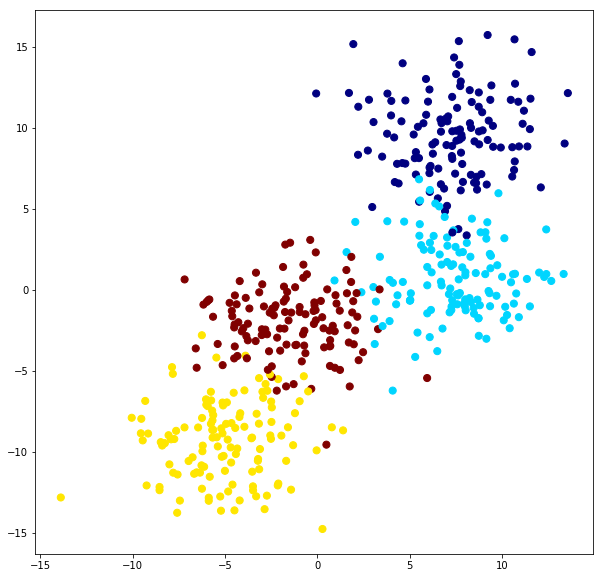

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=4,
                  random_state=8, cluster_std=2.4)

#Scatter plot the points
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    classifier.fit(X, y)
    
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
     
        if i < 0:
            return

        tree = classifier.tree_

        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

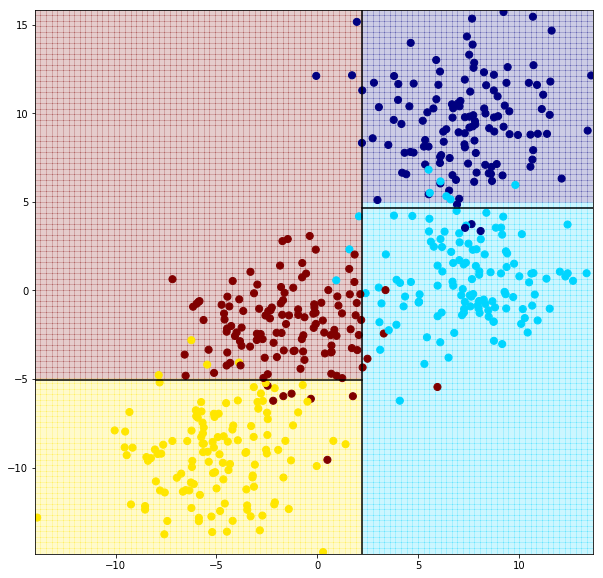

In [8]:
clf = DecisionTreeClassifier(max_depth=2,random_state=0)
visualize_tree(clf,X,y)

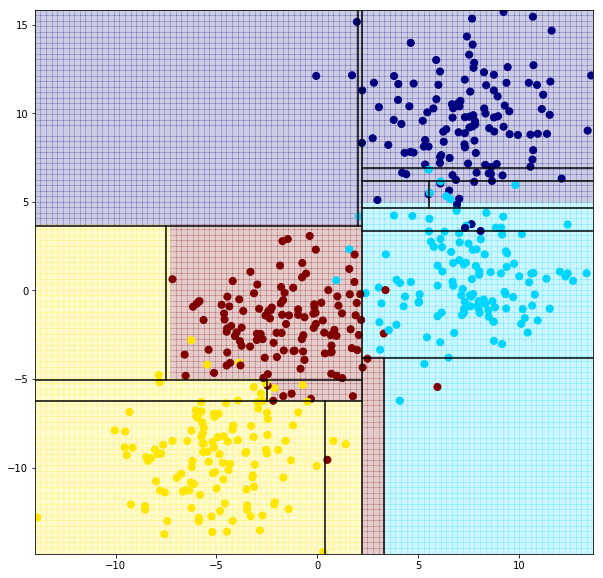

In [9]:
clf = DecisionTreeClassifier(max_depth=4,random_state=0)
visualize_tree(clf,X,y)

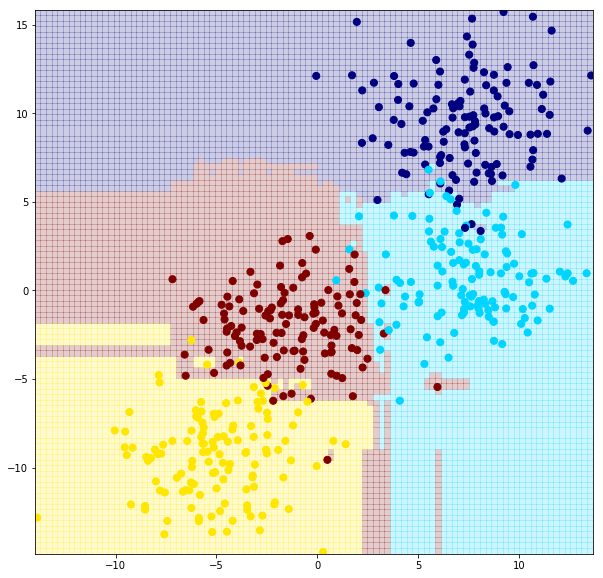

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,random_state=0)
visualize_tree(clf,X,y,boundaries=False)

<Container object of 3 artists>

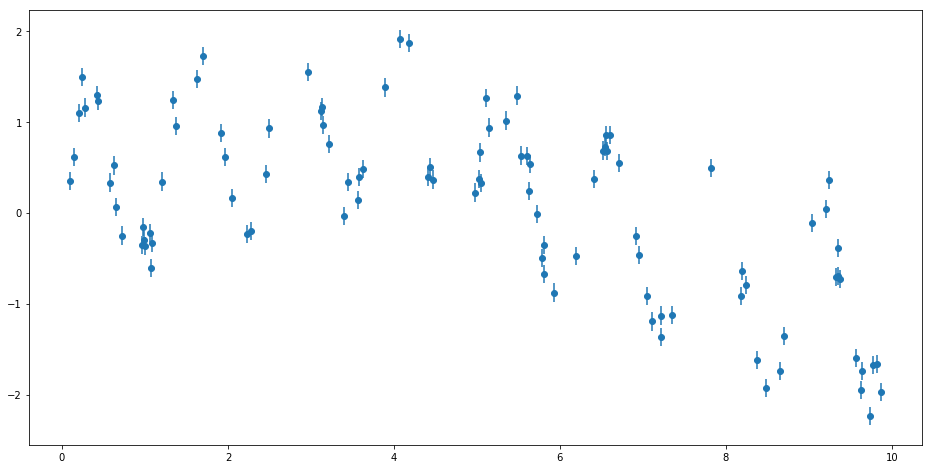

In [11]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def sin_model(x, sigma=0.2):
   
    noise = sigma * np.random.randn(len(x))

    return np.sin(5 * x) + np.sin(0.5 * x) + noise

y = sin_model(x)

plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

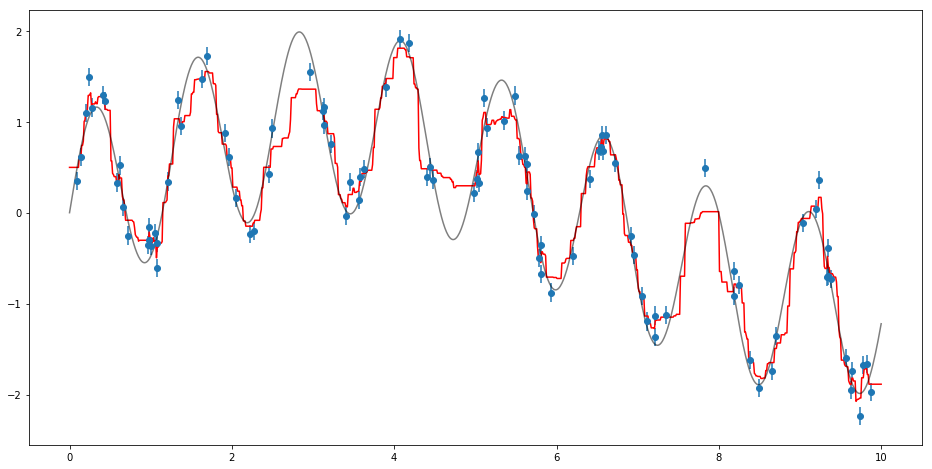

In [12]:
xfit = np.linspace(0, 10, 1000)

rfr = RandomForestRegressor(100)

rfr.fit(x[:, None], y)

yfit = rfr.predict(xfit[:, None])

ytrue = sin_model(xfit, 0)

plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);